In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

1.1 Visualizing the data

In [104]:
data2 = np.loadtxt('ex2data1.txt', delimiter=',')

x = data2[:,:2]
y = data2[:,2]#[np.newaxis].T
print(x.shape, y.shape)

(100, 2) (100,)


In [98]:
pos = np.array([x[i] for i in range(x.shape[0]) if y[i] == 1])
neg = np.array([x[i] for i in range(x.shape[0]) if y[i] == 0])

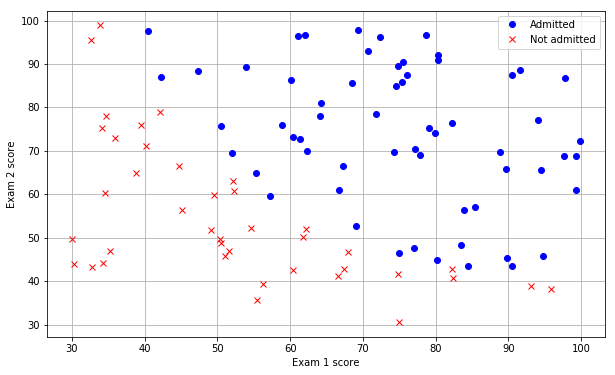

In [119]:
def plot_admit():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0], pos[:,1],'bo', label='Admitted')
    plt.plot(neg[:,0], neg[:,1], 'rx', label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plot_admit()

1.2 Implementation

Inserting a column of 1's in the x array

In [105]:
m, n = x.shape
x = np.insert(x, 0, 1, axis=1)
x.shape

(100, 3)

Creating the logistic cost function. I did it in a two step processes, creating a sigmoid function and then the actual cost function

In [106]:
def sigmoid(z):
    g = 1/(1+np.exp(z))
    return g

def cost(theta, x, y):
    h = sigmoid(np.dot(x, theta)) 
    cost = -1*(1/m) * (np.dot(np.log(h).T, y) + np.dot(np.log(1-h).T, 1-y))
    return cost

Creates the gradient descent of the regression.

In [107]:
def gradient(theta, x, y):
    h = sigmoid(np.dot(x, theta))
    
    gradient = (1/m) * np.dot(x.T, (h-y))
    return gradient

Testing the cost function and gradient descent.

In [108]:
initial_theta = np.zeros(n+1)
print('gradient at zeros:', gradient(initial_theta, x, y))
print('cost at zeros:', cost(initial_theta, x, y))

gradient at zeros: [ -0.1        -12.00921659 -11.26284221]
cost at zeros: 0.6931471805599453


Using scipy optimize to do the same thing as above. This is simpler.

In [109]:
def sci_opt(theta, in_x, in_y):
    res = optimize.fmin(cost,
                        theta,
                        args = (in_x, in_y),    
                        maxiter = 400,
                        full_output = True)
    return res[0], res[1]

In [110]:
theta_sci, cost_sci = sci_opt(initial_theta, x, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 169
         Function evaluations: 290


In [111]:
cost(theta_sci, x, y)

0.20349770159225464

In [112]:
theta_sci

array([25.16126591, -0.20623141, -0.20147079])

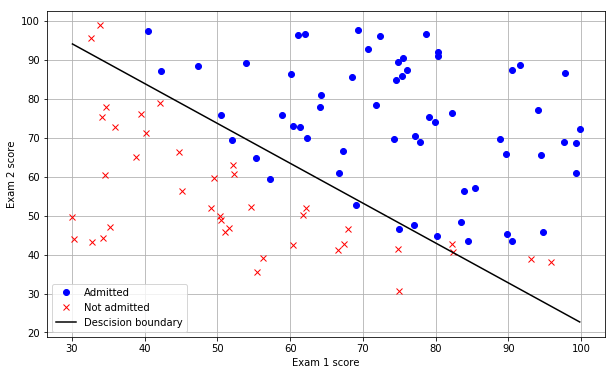

In [122]:
boundary_x = np.array([np.min(x[:,1]), np.max(x[:,1])])
boundary_y = (-1./theta_sci[2])*(theta_sci[0] + theta_sci[1]*boundary_x)

plot_admit()
plt.plot(boundary_x, boundary_y, 'k-', label = 'Descision boundary')
plt.legend()